In [15]:
#Library:

%matplotlib inline
import numpy as np
import math
import random
#import matplotib
import matplotlib.pyplot as plt
import matplotlib.colors
%config InlineBackend.figure_format='retina'

import matplotlib.gridspec as gridspec
from matplotlib import cm
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.contour import ContourSet
from matplotlib.path import Path
import matplotlib as mpl
import seaborn as sns
import pandas as pd
from scipy.optimize import curve_fit
#set the cosmology
from astropy.cosmology import FlatLambdaCDM
from astropy import constants as const
import astropy.units as u
import os
import glob
import re
import sys
from scipy.integrate import quad
from scipy import interpolate
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
from astropy.cosmology import FlatLambdaCDM
from scipy import interpolate
from tqdm.notebook import tqdm
Hubble_h = 0.673
Omega_M = 0.315
Omega_Lambda = 0.683
cosmo = FlatLambdaCDM(H0=Hubble_h*100, Om0=Omega_M)

#universal constant: i want all in solar mass , second and Mpc
c=const.c.to('Mpc/ s') /(u.Mpc)*(u.s) # Mpc/s
G=const.G.to('Mpc3 /M_sun s2') /(u.Mpc**3)*(u.s**2)*(u.M_sun)
Lsun=const.L_sun.value
# Create a FlatLambdaCDM instance
f_yr=1/(60*60*24*365.25)

#Cousr lib
import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from astroML.datasets import fetch_dr7_quasar


(array([ 2452080.,  7100258., 11057081., 13935310., 15448013., 15450051.,
        13932491., 11071544.,  7103646.,  2449526.]),
 array([2.36746144e-04, 3.14346210e-01, 6.28455675e-01, 9.42565139e-01,
        1.25667460e+00, 1.57078407e+00, 1.88489353e+00, 2.19900300e+00,
        2.51311246e+00, 2.82722193e+00, 3.14133139e+00]),
 <BarContainer object of 10 artists>)

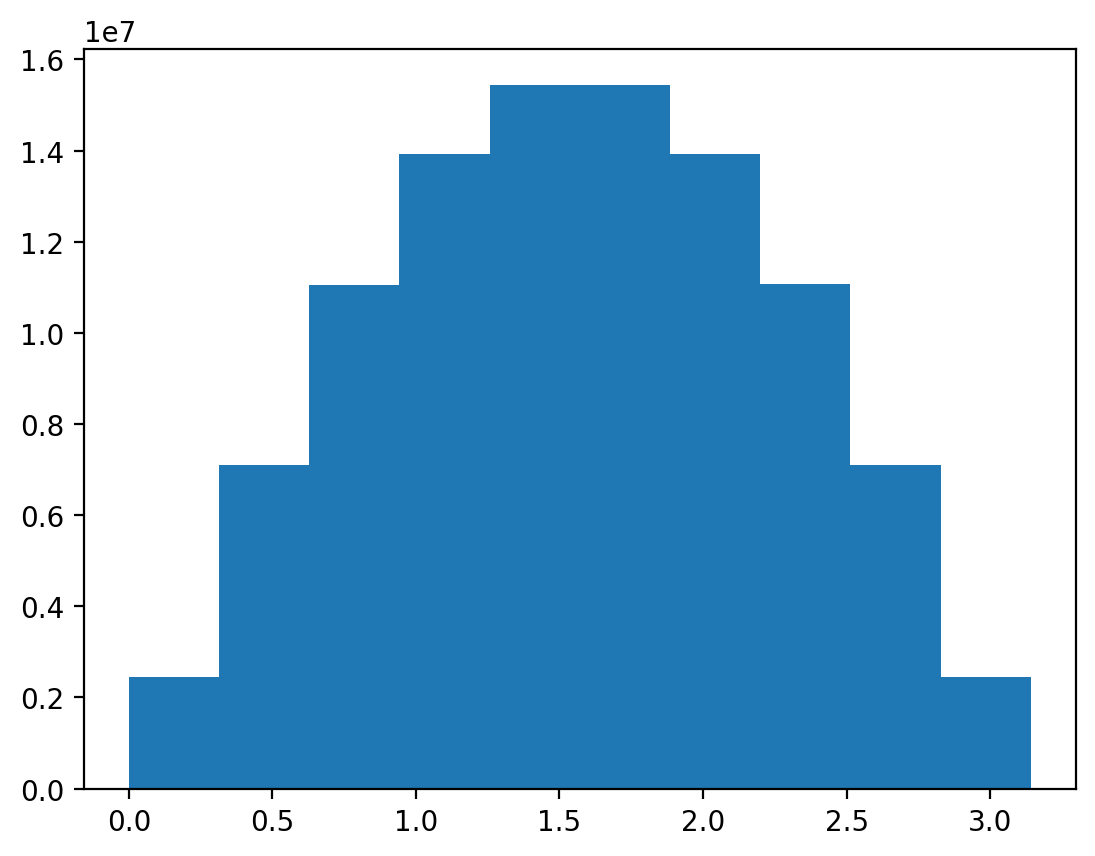

In [16]:
x = np.random.uniform(0,1,100000000)
theta = np.arccos(1-2*x)
plt.hist(theta)

In [17]:
xmax= 4
xmin=0.3

xi=np.random.uniform(xmin,xmax, 100000)

def fun(x):
    return np.exp(x)*(4*x+3)**0.5 * np.log(x**6)/np.tanh(x)

integral = (xmax-xmin) * np.mean(fun(xi))

integral

1396.852922033426

In [45]:
#exercise: 
# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

data = data['redshift']

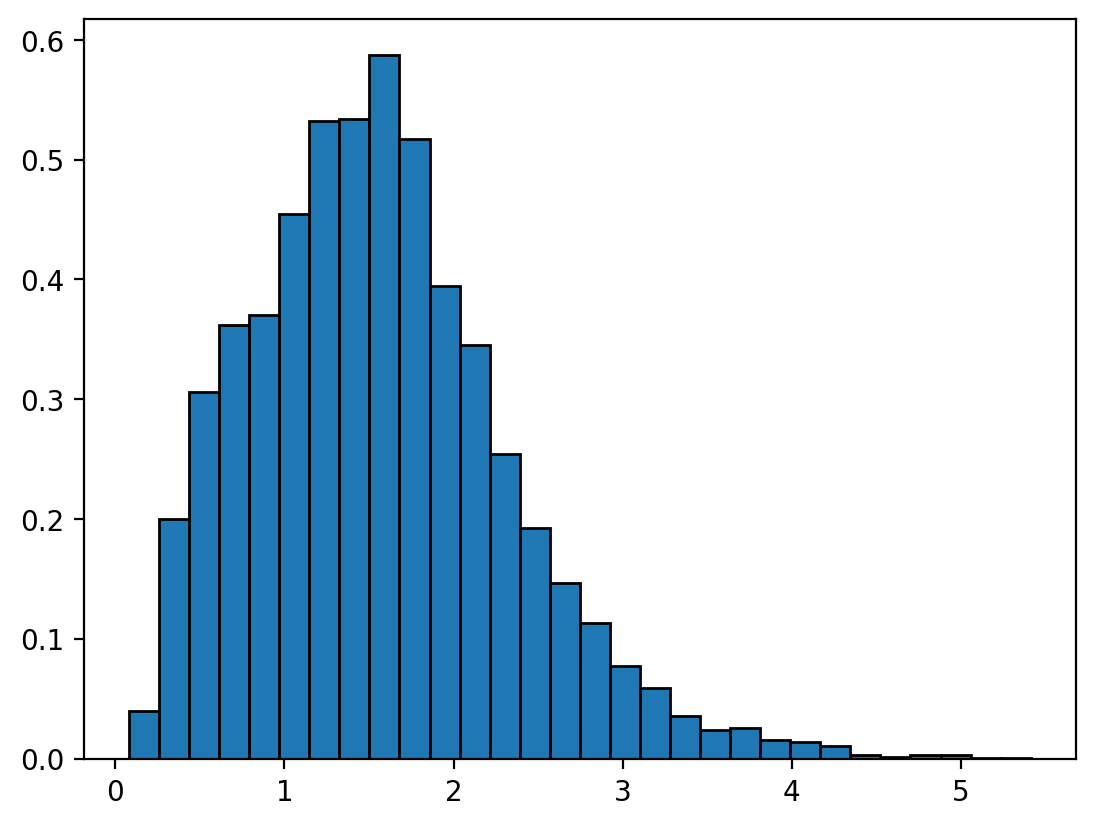

In [46]:
plt.hist(z,bins=30,edgecolor='black',density=True)
plt.show()

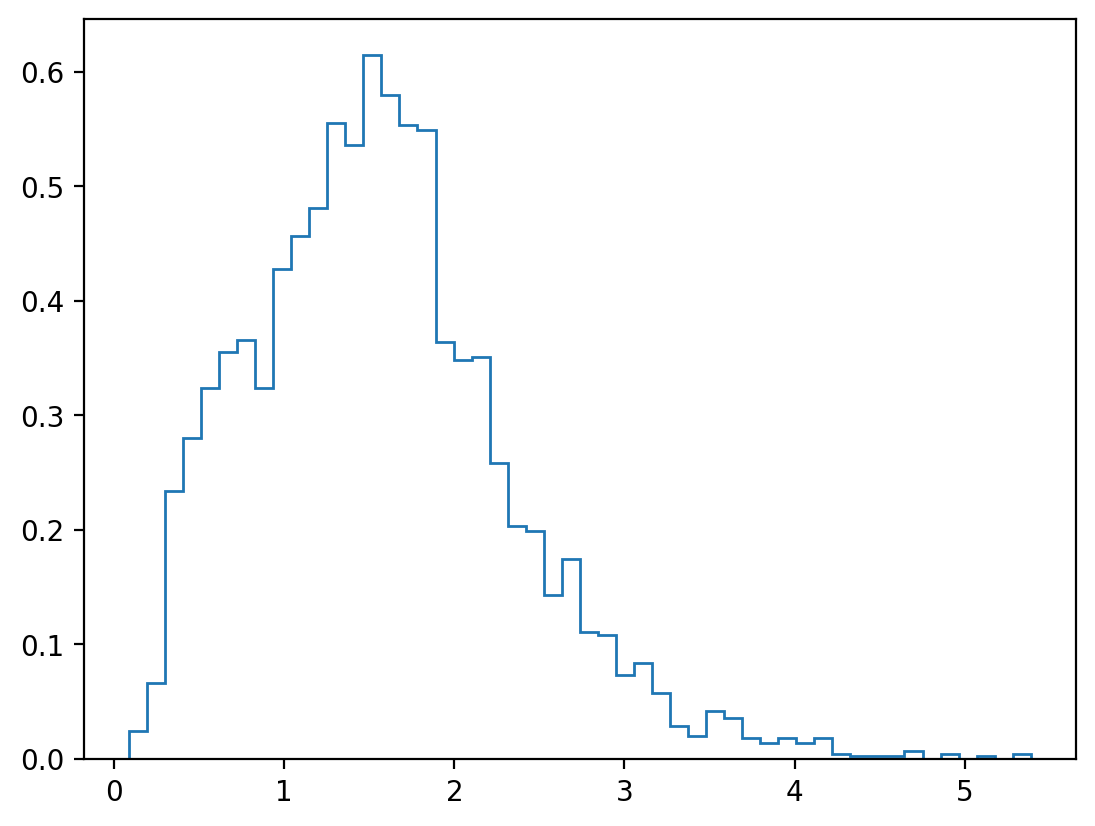

In [54]:
# make a simple histogram object
counts, bins = np.histogram(data, bins=50, density=True)
maxh = counts.max() # find the maximum

# Make a scipy.stats random variable object from a histogram
# This is a great hack!
disth = scipy.stats.rv_histogram((counts,bins))


# Let's do it manually again
N = 100000 # trials
q = np.random.uniform(-10, 30, N) # proposed points
u = np.random.uniform(0, maxh, N) # uniform draws

mask = u<=disth.pdf(q) # assess whether u <= q(x_i)

monte_carlo = q[mask] # reject all points that don't pass, using masking

plt.hist(monte_carlo, bins=50, density=True,histtype='step',label='cloned data 1');

(array([ 9909., 10094.,  9985.,  9976., 10116., 10135.,  9926.,  9857.,
        10102.,  9900.]),
 array([-9.99971497, -5.99987681, -2.00003864,  1.99979952,  5.99963768,
         9.99947584, 13.999314  , 17.99915216, 21.99899032, 25.99882849,
        29.99866665]),
 <BarContainer object of 10 artists>)

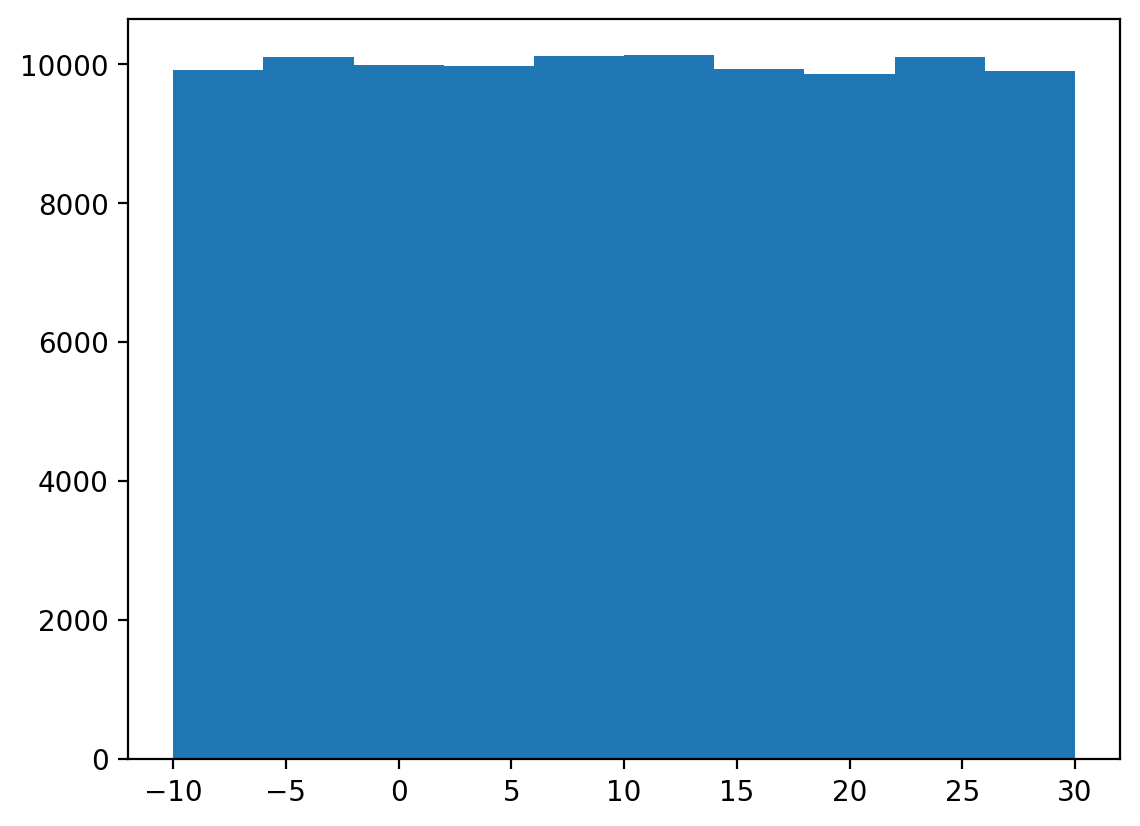

In [55]:
plt.hist(q)

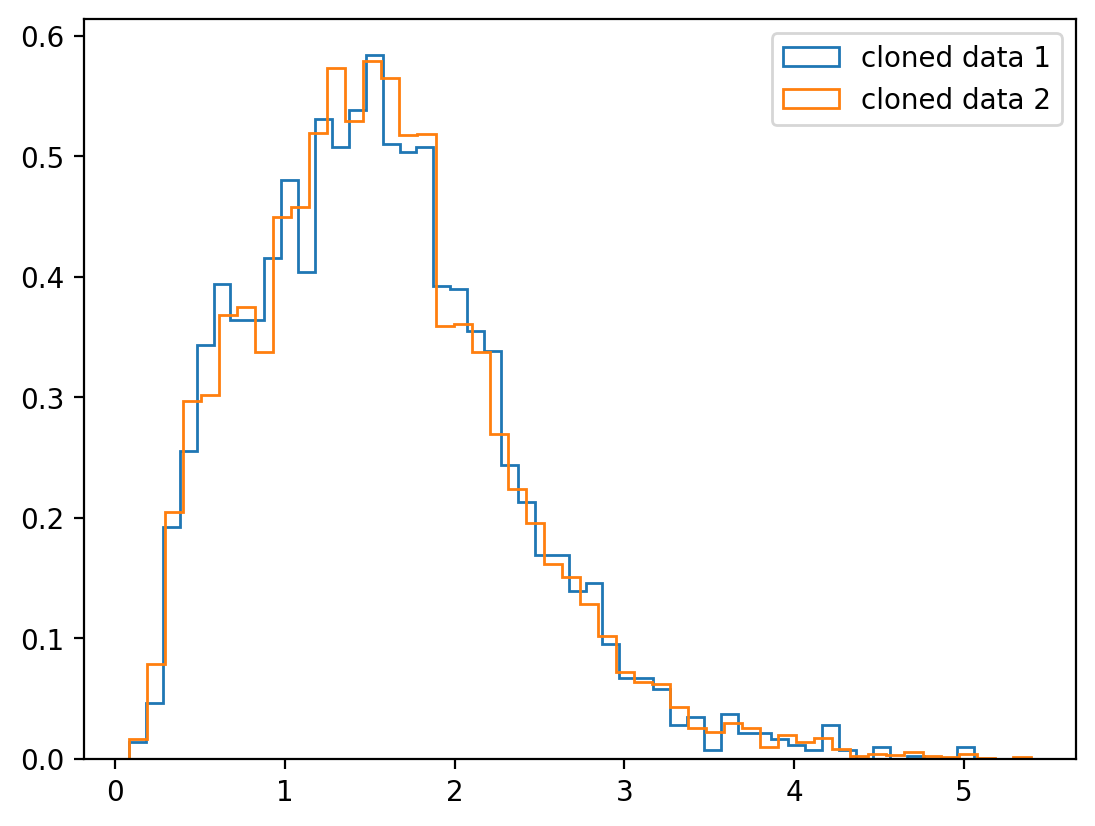

In [50]:
# Let's do it manually again
N = 100000 # trials
q = np.random.uniform(-10, 30, N) # proposed points
u = np.random.uniform(0, maxh, N) # uniform draws

mask = u<=disth.pdf(q) # assess whether u <= q(x_i)

monte_carlo = q[mask] # reject all points that don't pass, using masking

plt.hist(monte_carlo, bins=50, density=True,histtype='step',label='cloned data 1');

### But scipy has it already implemented 
plt.hist(disth.rvs(size=N),bins=50,density=True,histtype='step',label='cloned data 2');

plt.legend()
plt.show()